In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
# import sklearn

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, mean_squared_error

# import tensorflow as tf
# from tensorflow import keras

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

seed=99

In [2]:
four_factor_20 = pd.read_csv('team_factor_20.csv', index_col=0)
four_factor_20

,game_id,season,date,away_team,away_score,home_team,home_score,result,a_eFGp,a_FTr,a_ORBp,a_TOVp,h_eFGp,h_FTr,h_ORBp,h_TOVp
0,131410290001,1314,2013-10-29,ORL,87,IND,97,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,131410290002,1314,2013-10-29,CHI,95,MIA,107,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,131410290003,1314,2013-10-29,LAC,103,LAL,116,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,131410300004,1314,2013-10-30,BRK,94,CLE,98,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,131410300005,1314,2013-10-30,BOS,87,TOR,93,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11974,222304091226,2223,2023-04-09,UTA,117,LAL,128,1,0.531974,0.208931,0.26085,0.130643,0.551074,0.256529,0.25150,0.122359
11975,222304091227,2223,2023-04-09,NOP,108,MIN,113,1,0.559531,0.215249,0.22615,0.123621,0.558774,0.188976,0.21240,0.118801
11976,222304091228,2223,2023-04-09,MEM,100,OKC,115,1,0.574054,0.177729,0.22735,0.106729,0.519053,0.231355,0.24340,0.097976
11977,222304091229,2223,2023-04-09,LAC,119,PHO,114,0,0.578306,0.233759,0.22060,0.128125,0.541712,0.189901,0.25815,0.104120


In [3]:
four_factor_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11979 entries, 0 to 11978
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   game_id     11979 non-null  int64  
 1   season      11979 non-null  int64  
 2   date        11979 non-null  object 
 3   away_team   11979 non-null  object 
 4   away_score  11979 non-null  int64  
 5   home_team   11979 non-null  object 
 6   home_score  11979 non-null  int64  
 7   result      11979 non-null  int64  
 8   a_eFGp      11966 non-null  float64
 9   a_FTr       11966 non-null  float64
 10  a_ORBp      11966 non-null  float64
 11  a_TOVp      11966 non-null  float64
 12  h_eFGp      11961 non-null  float64
 13  h_FTr       11961 non-null  float64
 14  h_ORBp      11961 non-null  float64
 15  h_TOVp      11961 non-null  float64
dtypes: float64(8), int64(5), object(3)
memory usage: 1.6+ MB


In [4]:
four_factor_20.describe()

,game_id,season,away_score,home_score,result,a_eFGp,a_FTr,a_ORBp,a_TOVp,h_eFGp,h_FTr,h_ORBp,h_TOVp
count,1.197900e+04,11979.000000,11979.000000,11979.000000,11979.000000,11966.000000,11966.000000,11966.000000,11966.000000,11961.000000,11961.000000,11961.000000,11961.000000
mean,1.763236e+11,1763.175557,106.328325,108.643042,0.572502,0.519485,0.203125,0.233551,0.123704,0.519040,0.202822,0.233369,0.123703
std,2.920031e+10,292.003775,13.135676,13.018141,0.494736,0.027820,0.026807,0.029707,0.012593,0.027680,0.027175,0.029441,0.012385
min,1.314010e+11,1314.000000,66.000000,64.000000,0.000000,0.415638,0.064516,0.108000,0.082211,0.388889,0.086022,0.125000,0.066163
25%,1.516032e+11,1516.000000,97.000000,100.000000,0.000000,0.500565,0.184196,0.213650,0.114715,0.500000,0.183673,0.213200,0.114788
50%,1.718121e+11,1718.000000,106.000000,108.000000,1.000000,0.519723,0.200706,0.232300,0.123303,0.519308,0.200573,0.232150,0.123367
75%,2.021032e+11,2021.000000,115.000000,117.000000,1.000000,0.538135,0.219922,0.252500,0.131639,0.537912,0.219965,0.251900,0.131830
max,2.223123e+11,2223.000000,176.000000,175.000000,1.000000,0.642857,0.358025,0.422000,0.224873,0.615018,0.368889,0.359000,0.218341


In [5]:
four_factor_20.dropna(inplace=True)
four_factor_20.reset_index(drop=True, inplace=True)

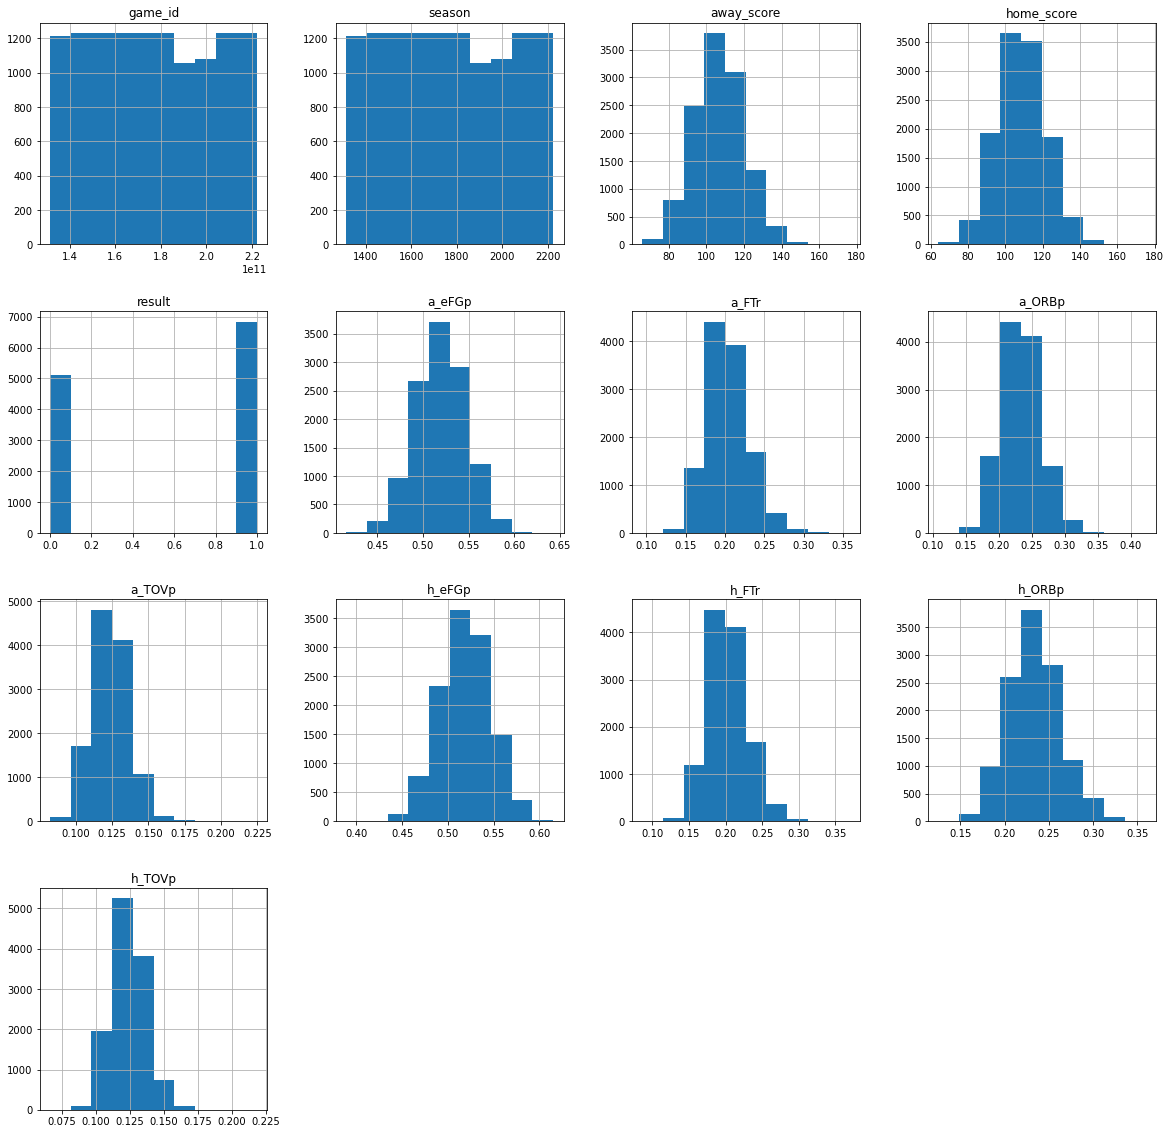

In [6]:
four_factor_20.hist(figsize=(20,20));

In [7]:
four_factor_20['result'].value_counts(normalize=True)

1    0.572026
0    0.427974
Name: result, dtype: float64

In [8]:
four_factor_sum = four_factor_20

In [9]:
four_factor_20['eFGp'] = four_factor_20['a_eFGp'] - four_factor_20['h_eFGp']
four_factor_20['FTr'] = four_factor_20['a_FTr'] - four_factor_20['h_FTr']
four_factor_20['ORBp'] = four_factor_20['a_ORBp'] - four_factor_20['h_ORBp']
four_factor_20['TOVp'] = four_factor_20['a_TOVp'] - four_factor_20['h_TOVp']

In [10]:
results_df = pd.DataFrame(columns=['model_name', 'cv_score', 'gs_score', 'train_score', 'test_score'])
residuals_df = pd.DataFrame(columns=['y_true'])

In [11]:
class ModelEval():
    '''
    Evaluate binary classifier models and perform fairness/bias analysis.
    
    This class consolidates the various tests and metrics needed to evaluate a given model
    on this binary classification problem. The class also provides methods for performing fairness and bias analysis.
    
    Parameters
    ----------
    model : an sklearn classifier-model object. Must already be instantiated.
    
    model_name : a string used to identify the model.
    
    train_score_df : a training set dataframe to contain the relevant metrics and compare different models.
    
    test_score_df : a test set dataframe to contain the relevant metrics and compare different models.
    
    fpr_max : the threshold used to set the maximum allowed false positive rate.
    '''
    
    def __init__(self, model, model_name, results_df, residuals_df, stats, param_grid):
        
        self.model = model
        self.model_name = model_name
        self.results_df = results_df
        self.residuals_df = residuals_df
        self.X_train, self.X_test, self.y_train, self.y_test = stats
        self.param_grid = param_grid
        self.cv_score = None
        self.gs_score = None
    
    def calc_cv_score(self):
        
        cv_scores = cross_val_score(self.model, self.X_train, self.y_train, cv=3)
        self.cv_score = cv_scores.mean()
        return self.cv_score
    
    def calc_grid_search(self):
        
        grid_search = GridSearchCV(self.model, self.param_grid, cv=3)
        grid_search.fit(self.X_train, self.y_train)
        self.params_model = grid_search.best_estimator_
        self.gs_score = grid_search.best_score_
#         grid_search.best_score_
    
    def fit_model(self):
        
        if self.param_grid == None:
            self.fitted_model = self.model.fit(self.X_train, self.y_train)
            return self.fitted_model
        
        else:
            self.fitted_model = self.params_model.fit(self.X_train, self.y_train)
            return self.fitted_model
    
    def calc_train_preds(self):
        
        self.train_preds = self.fitted_model.predict(self.X_train)
        return self.train_preds
    
    def calc_test_preds(self):
        
        self.test_preds = self.fitted_model.predict(self.X_test)
        return self.test_preds
    
    def calc_train_score(self):
        
        self.train_score = self.fitted_model.score(self.X_train, self.y_train)
        return self.train_score
    
    def calc_test_score(self):
    
        self.test_score = self.fitted_model.score(self.X_test, self.y_test)
        return self.test_score
    
    def create_conf_matrix(self):
        conf_matrix = confusion_matrix(y_true=self.y_test, y_pred=self.test_preds)
        self.disp = ConfusionMatrixDisplay(conf_matrix)
        return self.disp.plot();
    
    def record_results(self):
        
        idx = self.results_df.shape[0]
        results_df.loc[idx] = [self.model_name, self.cv_score, self.gs_score, self.train_score, self.test_score]
        
        return self.results_df
    
    def calc_residuals(self):
        
        train_preds_df = pd.DataFrame(self.train_preds, index=self.y_train.index)
        test_preds_df = pd.DataFrame(self.test_preds, index=self.y_test.index)
        
        self.model_preds = pd.concat([train_preds_df, test_preds_df]).sort_index()
        
        self.residuals_df[f'{self.model_name}' + '_residuals'] = self.residuals_df['y_true'] - self.model_preds[0]
    
    def full_diag(self):
        
        if self.param_grid == None:   
            self.calc_cv_score()
        else:
            self.calc_grid_search()
            
        self.fit_model()
        self.calc_train_preds()
        self.calc_test_preds()
        self.calc_train_score()
        self.calc_test_score()
        self.create_conf_matrix()
        self.record_results()
        self.calc_residuals()
    
    def plot_error(self):
        
        season_error_counts = []
        for season in X['season'].unique():
            season_stats = X[X['season'] == season]
            season_stats['bin'] = pd.cut(season_stats.index, bins=4, labels=[0,1,2,3])

            error_counts = []
            for bn in season_stats['bin'].unique(): 
                error_count = season_stats['svc_residuals'][season_stats['bin'] == bn].astype(bool).sum(axis=0)
                error_counts.append(error_count)

            season_error_counts.append(error_counts)

### baseline model is to just pick home team (57.2% accuracy).

In [12]:
stat_columns = ['a_eFGp', 'a_FTr', 'a_ORBp', 'a_TOVp', 'h_eFGp', 'h_FTr', 'h_ORBp', 'h_TOVp']
X = four_factor_20[stat_columns]
y = four_factor_20['result']


In [13]:
stats = train_test_split(X, y, train_size=.75, random_state=seed)
log = LogisticRegression()

log_model = ModelEval(log, 'log_4F_8var', results_df, residuals_df, stats, None)

,model_name,cv_score,gs_score,train_score,test_score
0,log_4F_8var,0.599889,None,0.610814,0.596122


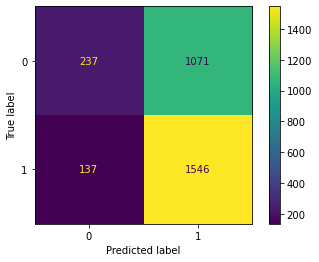

In [14]:
log_model.full_diag()
results_df

In [15]:
# X_train = sm.add_constant(X_train)
# log_model=sm.Logit(y_train,X_train).fit()
# print(log_model.summary())

### try with combined stats

In [16]:
stat_columns = ['eFGp', 'FTr', 'ORBp', 'TOVp', 'season']
X = four_factor_20[stat_columns]
y = four_factor_20['result']

stats = train_test_split(X.drop(['season'], axis=1), y, train_size=.75, random_state=seed)
residuals_df['y_true'] = y

In [17]:
logreg = LogisticRegression()

logreg_model = ModelEval(logreg, 'logreg_4F', results_df, residuals_df, stats, None)

,model_name,cv_score,gs_score,train_score,test_score
0,log_4F_8var,0.599889,None,0.610814,0.596122
1,logreg_4F,0.616165,None,0.622854,0.599465


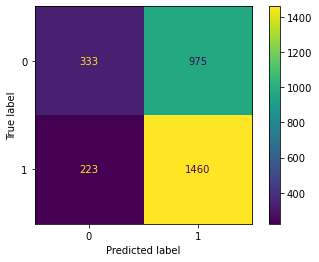

In [18]:
logreg_model.full_diag()
results_df

### now with grid search

In [19]:
logreg_gs = LogisticRegression(solver='saga', random_state=seed)
log_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.1, 1.0, 10.0, 100.0],
}

In [20]:
logreg_gs_model = ModelEval(logreg_gs, 'logreg_gs_4F', results_df, residuals_df, stats, log_param_grid)

,model_name,cv_score,gs_score,train_score,test_score
0,log_4F_8var,0.599889,NaN,0.610814,0.596122
1,logreg_4F,0.616165,NaN,0.622854,0.599465
2,logreg_gs_4F,NaN,0.632219,0.629989,0.619191


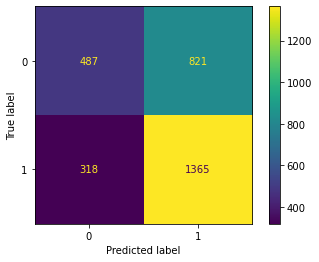

In [21]:
logreg_gs_model.full_diag()
results_df

In [22]:
# logreg_model = grid_search.best_estimator_.fit(X_train, y_train)
# train_pred = logreg_model.predict(X_train)
# test_pred = logreg_model.predict(X_test)
# logreg_model.score(X_test, y_test)

In [23]:
# coefs = np.abs(model.coef_[0])
# coefs[0] / sum(coefs)

In [24]:
# coefficients = model.coef_
# avg_importance = np.mean(np.abs(coefficients), axis=0)

# feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
# feature_importance = feature_importance.sort_values('Importance', ascending=True)
# feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [25]:
# X_train = sm.add_constant(X_train)
# log_model=sm.Logit(y_train,X_train).fit()
# print(log_model.summary())

### lots of false positives (model errs toward always choosing home team)

### KNN

,model_name,cv_score,gs_score,train_score,test_score
0,log_4F_8var,0.599889,NaN,0.610814,0.596122
1,logreg_4F,0.616165,NaN,0.622854,0.599465
2,logreg_gs_4F,NaN,0.632219,0.629989,0.619191
3,knn_4F,NaN,0.602118,0.655630,0.587429


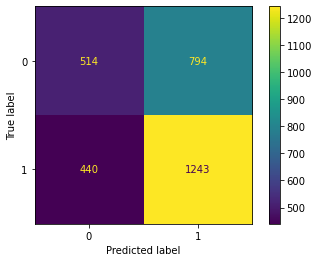

In [26]:
knn = KNeighborsClassifier()

knn_param_grid = {
    'n_neighbors': [11, 13, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
}

knn_model = ModelEval(knn, 'knn_4F', results_df, residuals_df, stats, knn_param_grid)

knn_model.full_diag()
results_df

In [27]:
print(knn_model.params_model)

KNeighborsClassifier(n_neighbors=15, p=3)


### Random Forest

In [28]:
# already tried other parameters, this is reduced for comp time
# param_grid = {
#     'criterion': ['gini'],
#     'n_estimators': [150, 200, 250],
#     'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'max_features': ['auto']
# }

,model_name,cv_score,gs_score,train_score,test_score
0,log_4F_8var,0.599889,NaN,0.610814,0.596122
1,logreg_4F,0.616165,NaN,0.622854,0.599465
2,logreg_gs_4F,NaN,0.632219,0.629989,0.619191
3,knn_4F,NaN,0.602118,0.655630,0.587429
4,rfc_4F,NaN,0.629543,0.675139,0.622869


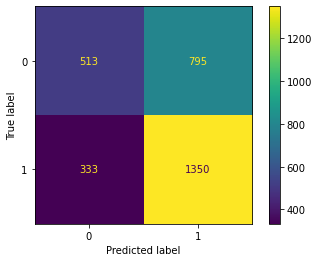

In [29]:
rfc = RandomForestClassifier(random_state=seed)

rfc_param_grid = {
    'criterion': ['gini'],
    'n_estimators': [150, 200, 250],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2],
    'min_samples_leaf': [3, 4, 5],
    'max_features': ['auto']
}

rfc_model = ModelEval(rfc, 'rfc_4F', results_df, residuals_df, stats, rfc_param_grid)

rfc_model.full_diag()
results_df

In [30]:
rfc_model.params_model

RandomForestClassifier(max_depth=7, max_features='auto', min_samples_leaf=4,
                       n_estimators=200, random_state=99)

### Naive Bayes

,model_name,cv_score,gs_score,train_score,test_score
0,log_4F_8var,0.599889,NaN,0.610814,0.596122
1,logreg_4F,0.616165,NaN,0.622854,0.599465
2,logreg_gs_4F,NaN,0.632219,0.629989,0.619191
3,knn_4F,NaN,0.602118,0.655630,0.587429
4,rfc_4F,NaN,0.629543,0.675139,0.622869
5,gnb_4F,0.625641,None,0.627759,0.617519


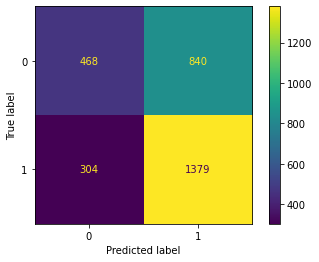

In [31]:
gnb = GaussianNB()

gnb_model = ModelEval(gnb, 'gnb_4F', results_df, residuals_df, stats, None)
gnb_model.full_diag()
results_df

### SVC

,model_name,cv_score,gs_score,train_score,test_score
0,log_4F_8var,0.599889,NaN,0.610814,0.596122
1,logreg_4F,0.616165,NaN,0.622854,0.599465
2,logreg_gs_4F,NaN,0.632219,0.629989,0.619191
3,knn_4F,NaN,0.602118,0.655630,0.587429
4,rfc_4F,NaN,0.629543,0.675139,0.622869
5,gnb_4F,0.625641,None,0.627759,0.617519
6,svc_4F,NaN,0.626756,0.635006,0.610832


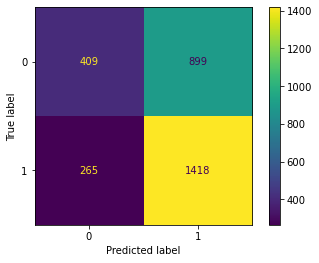

In [32]:
svc = SVC(random_state=seed)

svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svc_model = ModelEval(svc, 'svc_4F', results_df, residuals_df, stats, svc_param_grid)
svc_model.full_diag()
results_df

### error modeling

In [33]:
models = [log_model, logreg_model, logreg_gs_model, knn_model, rfc_model, gnb_model, svc_model]

# for model in models:
#     model_preds = pd.concat([pd.DataFrame(model.train_preds, index=model.y_train.index), pd.DataFrame(model.test_preds, index=model.y_test.index)]).sort_index()

In [34]:
# season_error_counts = []
# for season in X['season'].unique():
#     season_stats = X[X['season'] == season]
#     season_stats['bin'] = pd.cut(season_stats.index, bins=4, labels=[0,1,2,3])
    
#     error_counts = []
#     for bn in season_stats['bin'].unique(): 
#         error_count = season_stats['svc_residuals'][season_stats['bin'] == bn].astype(bool).sum(axis=0)
#         error_counts.append(error_count)
        
#     season_error_counts.append(error_counts)

In [35]:
residuals_df

,y_true,log_4F_8var_residuals,logreg_4F_residuals,logreg_gs_4F_residuals,knn_4F_residuals,rfc_4F_residuals,gnb_4F_residuals,svc_4F_residuals
0,1,NaN,1,0,1,0,1,0
1,1,NaN,1,1,0,1,1,1
2,1,NaN,1,1,1,1,1,0
3,1,NaN,0,0,0,0,0,0
4,0,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
11956,1,NaN,0,0,0,0,0,0
11957,1,NaN,0,0,0,0,0,0
11958,1,NaN,1,1,1,1,1,1
11959,0,NaN,-1,-1,-1,-1,0,-1


In [36]:
error_df = residuals_df.drop(['y_true', 'log_4F_8var_residuals'], axis=1)
error_df['season'] = four_factor_20['season']

In [37]:
error_dict = {}
for model in error_df.columns[:-1]:
    
    model_error = {}
    for season in error_df['season'].unique():

        season_stats = error_df[model][error_df['season'] == season].to_frame()
        season_stats['bin'] = pd.cut(season_stats.index, bins=4, labels=[0,1,2,3])
        
        season_error_list = []
        for b in season_stats['bin'].unique():
            error_count = season_stats[model][season_stats['bin'] == b].astype(bool).sum(axis=0)
            season_error_list.append(error_count)
    
        model_error[season] = season_error_list
        
    error_dict[model] = model_error

In [38]:
for model in error_dict:
    
    q_avg = []
    for n in list(range(4)):

        avg_error = round(np.mean([season[n] for season in error_dict[model].values()]), 1)
        q_avg.append(avg_error)
    
    error_dict[model]['q_avg'] = q_avg

In [39]:
error_dict

{'logreg_4F_residuals': {1314: [121, 123, 110, 108],
  1415: [118, 135, 106, 97],
  1516: [116, 109, 102, 118],
  1617: [121, 106, 124, 109],
  1718: [118, 126, 118, 108],
  1819: [122, 108, 104, 122],
  1920: [100, 115, 101, 108],
  2021: [120, 108, 100, 107],
  2122: [113, 126, 128, 115],
  2223: [112, 116, 130, 133],
  'q_avg': [116.1, 117.2, 112.3, 112.5]},
 'logreg_gs_4F_residuals': {1314: [111, 123, 109, 114],
  1415: [106, 130, 108, 96],
  1516: [120, 106, 103, 117],
  1617: [119, 111, 121, 106],
  1718: [113, 122, 108, 108],
  1819: [121, 105, 96, 127],
  1920: [92, 103, 96, 108],
  2021: [117, 101, 92, 94],
  2122: [113, 123, 126, 112],
  2223: [113, 116, 126, 126],
  'q_avg': [112.5, 114.0, 108.5, 110.8]},
 'knn_4F_residuals': {1314: [108, 107, 106, 111],
  1415: [113, 109, 101, 104],
  1516: [116, 107, 97, 112],
  1617: [114, 99, 119, 110],
  1718: [113, 120, 107, 98],
  1819: [117, 103, 107, 114],
  1920: [103, 102, 84, 109],
  2021: [116, 99, 84, 84],
  2122: [112, 122, 12

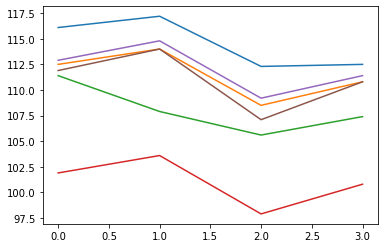

In [40]:
for model in error_dict.keys():
    plt.plot(error_dict[model]['q_avg']);